<a href="https://colab.research.google.com/github/Amirrezahmi/Video-Inpainting-and-Voice-Cloning/blob/main/video%20inpainting/applying%20IS%20to%20video/applying_SAM_to_video_frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set up your environment
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-6inu1obf
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-6inu1obf
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36588 sha256=958c45f399581205e1e9df26fd7d95542af027fab6648d7d197f25d9d2f144b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-a888pvqq/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install transformers

In [ ]:
import torch
import numpy as np
from PIL import Image
import cv2
import os
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import matplotlib.pyplot as plt

# Set up SAM model as before
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = 'sam_vit_h_4b8939.pth'
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
def video_to_frames(video_path, frames_dir):
    video = cv2.VideoCapture(video_path)
    count = 0
    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break
        cv2.imwrite(frames_dir + "/{:d}.png".format(count), frame)
        count += 1
    video.release()
    #cv2.destroyAllWindows()
    return count

In [ ]:
frames_count_1 = video_to_frames('/content/video1.mp4', '/content/file12')
#frames_count_2 = video_to_frames('/content/video2.mp4', '/content/file16')

In [ ]:
frames_count_2 = video_to_frames('/content/video2.mp4', '/content/file16')

In [ ]:
import os
import shutil

# Define the directories
dir1 = '/content/file12'
dir2 = '/content/file16'

# Get the list of all files in directory 1
files_dir1 = set(os.listdir(dir1))

# Get the list of all files in directory 2
files_dir2 = set(os.listdir(dir2))

# Find the files which are in directory 2 but not in directory 1
files_to_delete = files_dir2 - files_dir1

# Remove these files from directory 2
for file in files_to_delete:
    file_path = os.path.join(dir2, file)
    if os.path.isfile(file_path):
        os.remove(file_path)

In [ ]:
import os
import shutil

# Define the directories
dir2 = '/content/file12'
dir1 = '/content/file16'

# Get the list of all files in directory 1
files_dir1 = set(os.listdir(dir1))

# Get the list of all files in directory 2
files_dir2 = set(os.listdir(dir2))

# Find the files which are in directory 2 but not in directory 1
files_to_delete = files_dir2 - files_dir1

# Remove these files from directory 2
for file in files_to_delete:
    file_path = os.path.join(dir2, file)
    if os.path.isfile(file_path):
        os.remove(file_path)

In [ ]:
import os

# Specify the folder where your images are located
folder_path = '/content/file12'

# List all files in the folder
files = os.listdir(folder_path)

# Sort the files by their numerical names
sorted_files = sorted(files, key=lambda x: int(x.split('.')[0]))

# Now, sorted_files contains your image filenames in numerical order
print(sorted_files)

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png'

In [ ]:
def display_masks(frames_dir1):
    # List all files in the folders
    files = os.listdir(frames_dir1)
    files.sort(key=lambda x: int(x.split('.')[0]))

    # Load the first image
    image_path1 = os.path.join(frames_dir1, files[0])
    image1 = Image.open(image_path1)
    image_np1 = np.array(image1)

    # Generate masks
    result = mask_generator.generate(image_np1)

    # Calculate the size of the grid based on the number of masks
    rows = int(np.ceil(np.sqrt(len(result))))
    cols = rows

    # Display the masks
    plt.figure(figsize=(20, 20))
    for i, segmentation in enumerate(result):
        plt.subplot(rows, cols, i+1)
        plt.imshow(segmentation['segmentation'], cmap='gray')
        plt.title(f"{i}")
    plt.show()

    return result

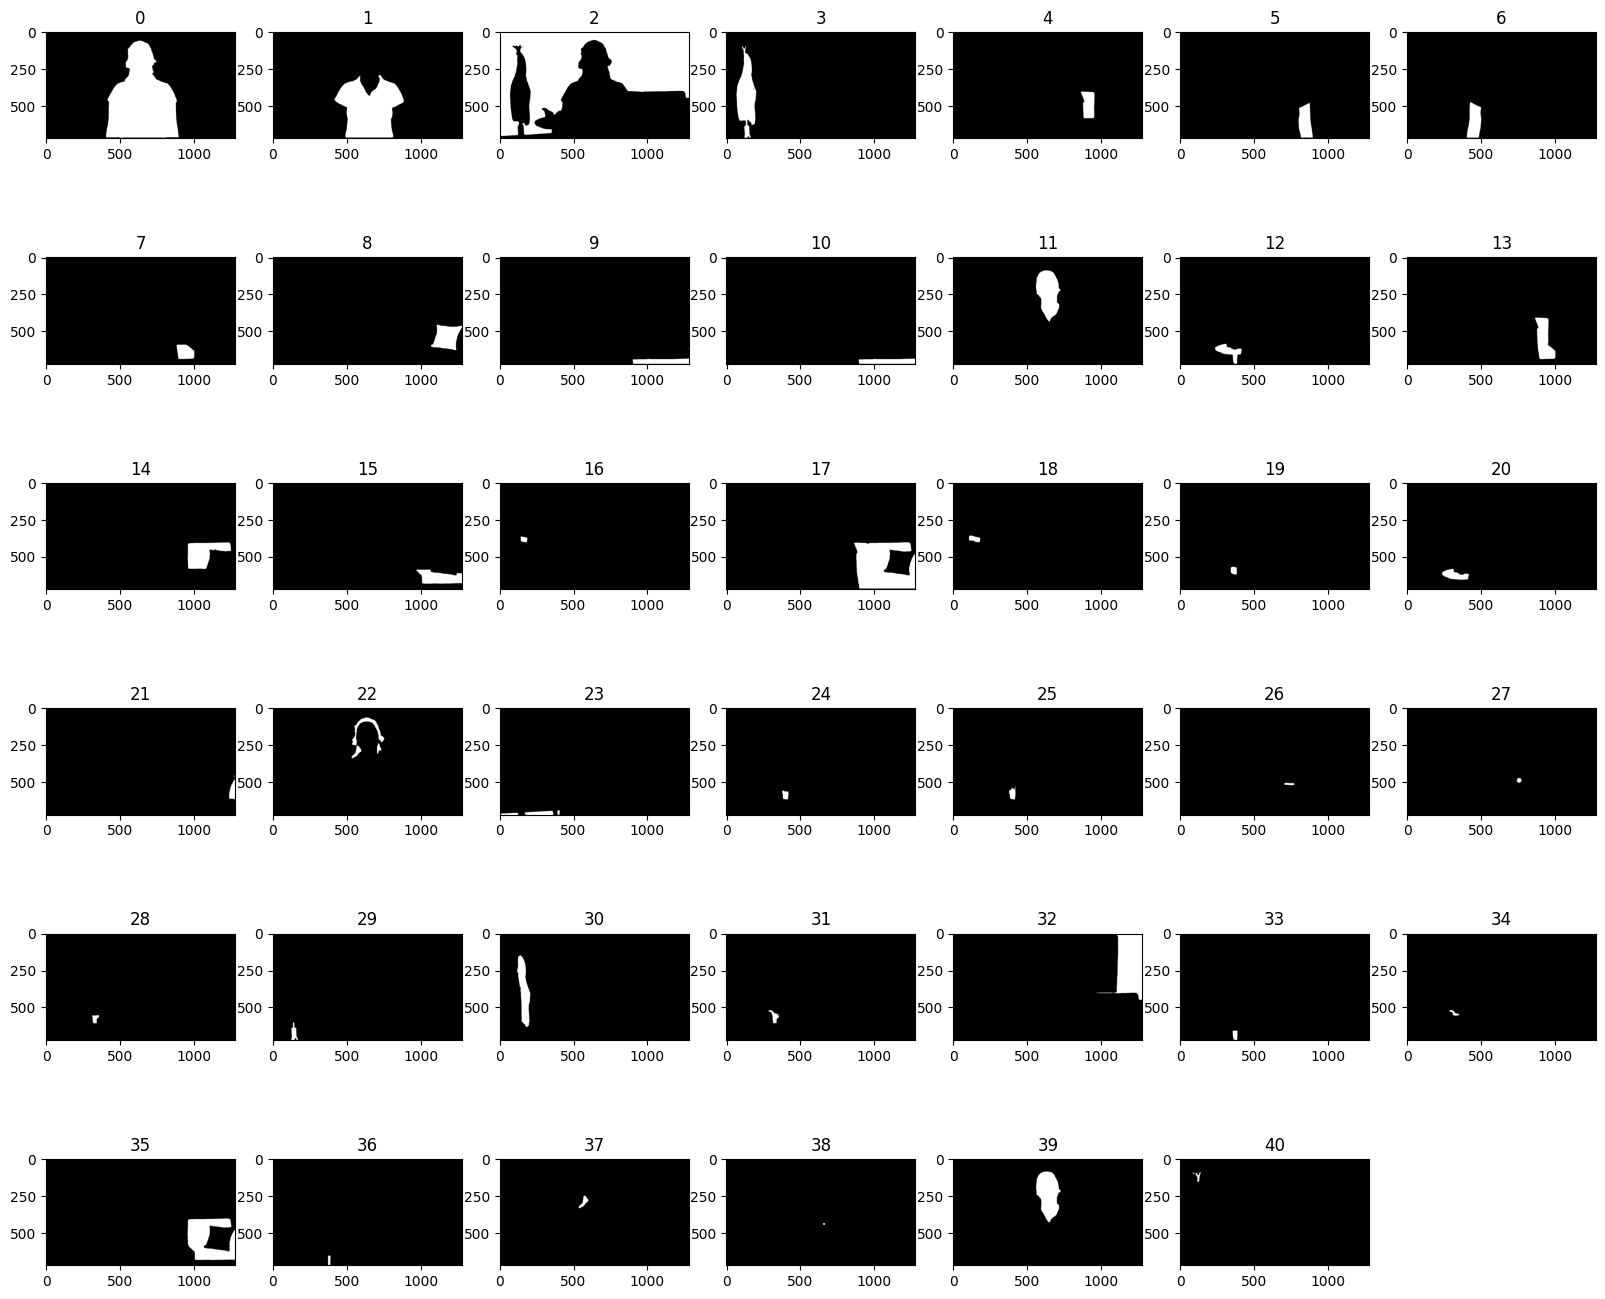

In [ ]:
result = display_masks('/content/file12')

In [ ]:
chosen_index = int(input("Enter the index of the mask to keep: "))

Enter the index of the mask to keep: 0


In [ ]:
def apply_sam_to_frames(frames_dir1, frames_dir2, output_dir, chosen_index):
    # List all files in the folders
    files = os.listdir(frames_dir1)
    files.sort(key=lambda x: int(x.split('.')[0]))

    # Initialize a binary mask with all zeros for the first frame
    previous_binary_mask = None

    # Iterate over the sorted files
    for file in files:
        # Load the images
        image_path1 = os.path.join(frames_dir1, file)
        image_path2 = os.path.join(frames_dir2, file)
        image1 = Image.open(image_path1)
        image2 = Image.open(image_path2)
        image_np1 = np.array(image1)

        # Generate masks
        result = mask_generator.generate(image_np1)

        # If this is the first frame, set the chosen mask as the previous mask
        if previous_binary_mask is None:
            previous_binary_mask = result[chosen_index]['segmentation']
        else:
            # Find the mask that most closely matches the previous mask
            best_iou = 0
            for i, segmentation in enumerate(result):
                # Get the mask
                mask_array = segmentation['segmentation']

                # Calculate the Intersection over Union (IoU) with the previous mask
                intersection = np.logical_and(previous_binary_mask, mask_array).sum()
                union = np.logical_or(previous_binary_mask, mask_array).sum()
                iou = intersection / union

                # If this mask has a higher IoU than the current best, make it the new best
                if iou > best_iou:
                    best_iou = iou
                    previous_binary_mask = mask_array

        # Convert the binary mask to uint8
        previous_binary_mask_uint8 = (previous_binary_mask * 255).astype(np.uint8)

        # Resize the mask and the image1 to match the size of the frame
        previous_binary_mask_resized = cv2.resize(previous_binary_mask_uint8, (image2.width, image2.height), interpolation = cv2.INTER_NEAREST)
        image1_resized = image1.resize((image2.width, image2.height))

        # Create a transparent image
        transparent_image = Image.new("RGBA", image2.size, (0, 0, 0, 0))

        # Paste the resized image1 onto the transparent image using the resized binary mask
        transparent_image.paste(image1_resized, (0, 0), mask=Image.fromarray(previous_binary_mask_resized))

        # Overlay the transparent image onto the second frame
        image2.paste(transparent_image, (0, 0), transparent_image)

        # Save the output frame
        image2.save(os.path.join(output_dir, file))

In [ ]:
apply_sam_to_frames('/content/file12', '/content/file16', '/content/out111', chosen_index)


In [ ]:
from os.path import isfile, join
import re

def frames_to_video(inputpath, outputpath, fps):
    frame_array = []
    files = [f for f in os.listdir(inputpath) if isfile(join(inputpath, f))]
    files.sort(key=lambda f: int(re.sub('\D', '', f)))
    for i in range(len(files)):
        filename = join(inputpath, files[i])  # use os.path.join to create the full file path
        img = cv2.imread(filename)
        if img is None:
            print(f"Could not load image: {filename}")
            continue
        height, width, layers = img.shape
        size = (width, height)
        frame_array.append(img)
    out = cv2.VideoWriter(outputpath, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release()

frames_to_video('/content/out111', 'output_video.mp4', 30)